In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import encodings
%matplotlib inline

In [2]:
data = pd.read_excel(r"C:\Users\Nahid\Desktop\sentiment\dataset.xlsx",encoding='utf-8')
data.head()

,comment,emotion
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad


In [3]:
data.head()
data.emotion.value_counts()

happy        1005
excited       638
sad           467
angry         399
abusive       195
surprise       84
religious      55
Name: emotion, dtype: int64

In [4]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(data['comment'])
y = data['emotion']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
dt = dt.fit(x_train, y_train)

In [7]:
test = "ফিরে আসুন আগের পারফ্মেন্স নিয়"
test_vector = tf.transform([test]) # vectorizing
print(dt.predict(test_vector))

['excited']


In [8]:
y_pred = dt.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  52.0 %


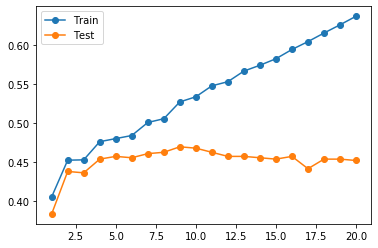

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
# configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
